<a href="https://colab.research.google.com/github/bindus06/Senti-Scope-Analyzing-Sentiments-Behind-YouTube-Comments/blob/main/task1_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn imbalanced-learn joblib

In [2]:
import kagglehub
import pandas as pd
import os

In [3]:
# Download latest version of Titanic dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)
print("Files in path:", os.listdir(path))

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset
Files in path: ['Titanic-Dataset.csv']


In [4]:
df = pd.read_csv(os.path.join(path, 'Titanic-Dataset.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467


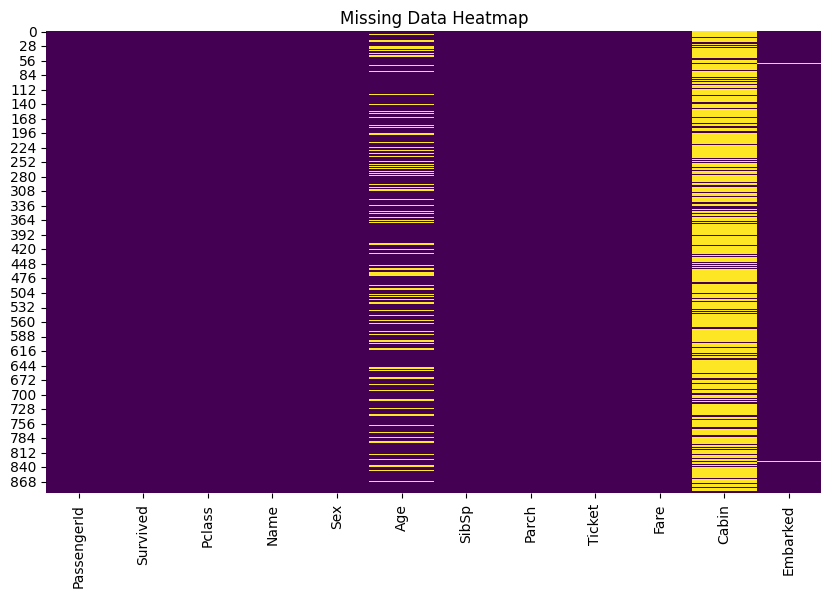

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [9]:
# 1️⃣ Embarked → fill with mode safely
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 2️⃣ Age → fill missing values using group median safely
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# 3️⃣ Cabin → extract Deck and mark missing as 'U'
df['Deck'] = df['Cabin'].fillna('U').astype(str).str[0]

# Drop original Cabin column
df = df.drop(columns=['Cabin'])


In [10]:
# 1️⃣ Encode Sex (male=1, female=0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 2️⃣ One-hot encode Embarked and Deck
df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=True)

# 3️⃣ If you have Title from feature engineering, one-hot encode it too
if 'Title' in df.columns:
    df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# 4️⃣ Quick check of resulting columns
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  Deck_B  Deck_C  Deck_D  \
0         A/5 21171   7.2500       False        True   False   False   False   
1          PC 17599  71.2833       False       False   False    True   False   
2  STON/O2. 3101282   7.9250       False        True   F

In [11]:
from sklearn.preprocessing import StandardScaler

# List numeric columns to scale
numeric_cols = ['Age', 'Fare']
# Add 'FamilySize' if you created it
if 'FamilySize' in df.columns:
    numeric_cols.append('FamilySize')

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check results
df[numeric_cols].head()


,Age,Fare
0,-0.534891,-0.502445
1,0.668392,0.786845
2,-0.234070,-0.488854
3,0.442776,0.420730
4,0.442776,-0.486337


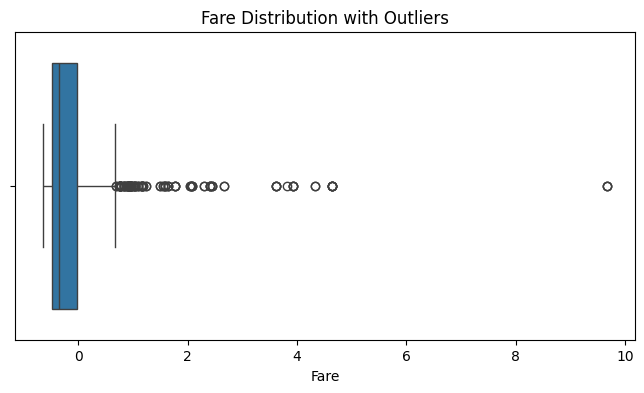

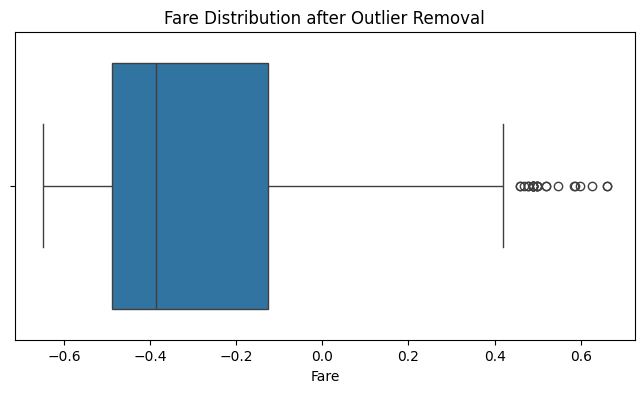

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Example: remove outliers in Fare
df_no_out = remove_outliers_iqr(df, 'Fare')

# Visualize
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution with Outliers')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_out['Fare'])
plt.title('Fare Distribution after Outlier Removal')
plt.show()


Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


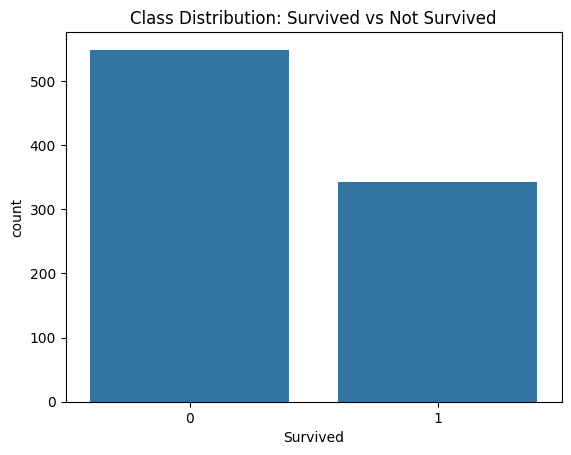

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each class
print(df['Survived'].value_counts())
print(df['Survived'].value_counts(normalize=True))  # percentage

# Visualize
sns.countplot(x='Survived', data=df)
plt.title('Class Distribution: Survived vs Not Survived')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Drop target and irrelevant columns
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = df['Survived']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check new class distribution
print(y_res.value_counts())


Survived
1    439
0    439
Name: count, dtype: int64


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [16]:
# Numeric features
num_features = ['Age', 'Fare']
if 'FamilySize' in df.columns:
    num_features.append('FamilySize')

# Categorical features
cat_features = ['Sex']  # already encoded as 0/1
# Include remaining one-hot columns if you used dummies
onehot_cols = [col for col in df.columns if any(prefix in col for prefix in ['Embarked_', 'Deck_', 'Title_'])]
cat_features.extend(onehot_cols)


In [17]:
# Numeric pipeline: impute (median) + scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: impute (most frequent) + one-hot (already dummies optional)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [18]:
# Logistic Regression pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit on training data (after SMOTE or original split)
model_pipeline.fit(X_res, y_res)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked_Q',
                                                   'Embarked_S', 'Deck_B',
                                                   'Deck_C', 'Deck_D', 'Deck_E',
                                                   'Deck_F', 'Deck_G', 'Deck_T',
                                                   'Deck_U'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7374301675977654
Confusion Matrix:
 [[83 27]
 [20 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       110
           1       0.64      0.71      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



In [20]:
# Save the cleaned and processed dataset
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'")


Cleaned dataset saved as 'titanic_cleaned.csv'


In [21]:
import joblib

# Save the full preprocessing + model pipeline
joblib.dump(model_pipeline, 'titanic_pipeline_model.pkl')
print("Pipeline and model saved as 'titanic_pipeline_model.pkl'")


Pipeline and model saved as 'titanic_pipeline_model.pkl'


In [22]:
loaded_pipeline = joblib.load('titanic_pipeline_model.pkl')
y_pred_new = loaded_pipeline.predict(X_test)


In [23]:
%%writefile README.md
# Titanic Data Cleaning Project

This project demonstrates step-by-step data cleaning, preprocessing, feature engineering, and model building for the Titanic dataset using Python.


Writing README.md


In [24]:
!apt-get install git -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [25]:
!git --version


git version 2.34.1


In [26]:
!git config --global user.name "bindus06"
!git config --global user.email "bindus7806@gmail.com"


In [27]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [28]:
!ls

README.md  sample_data	titanic_cleaned.csv  titanic_pipeline_model.pkl
